In [14]:
import fastbook
fastbook.setup_book()
from fastbook import *
from fastai.vision.widgets import *

In [15]:
key = os.environ.get('AZURE_SEARCH_KEY', '418e74b4ac444aa18ea6b0a8b2fe801c')
rash_types = 'Psoriasis','miliaria','eczema'
path = Path('SkinRashes')

In [16]:
from utils import *
if not path.exists():
    path.mkdir()
    for o in rash_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{o} Skin rashes')
        download_images(dest, urls=results.attrgot('contentUrl'))

In [17]:
fns = get_image_files(path)
fns

(#393) [Path('SkinRashes/Psoriasis/00000004.jpg'),Path('SkinRashes/Psoriasis/00000002.jpg'),Path('SkinRashes/Psoriasis/00000005.png'),Path('SkinRashes/Psoriasis/00000008.jpg'),Path('SkinRashes/Psoriasis/00000001.jpg'),Path('SkinRashes/Psoriasis/00000009.jpg'),Path('SkinRashes/Psoriasis/00000013.jpg'),Path('SkinRashes/Psoriasis/00000011.jpg'),Path('SkinRashes/Psoriasis/00000015.jpg'),Path('SkinRashes/Psoriasis/00000000.jpg')...]

In [18]:
failed = verify_images(fns)
failed

(#0) []

In [19]:
failed.map(Path.unlink);

In [20]:
rashes = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

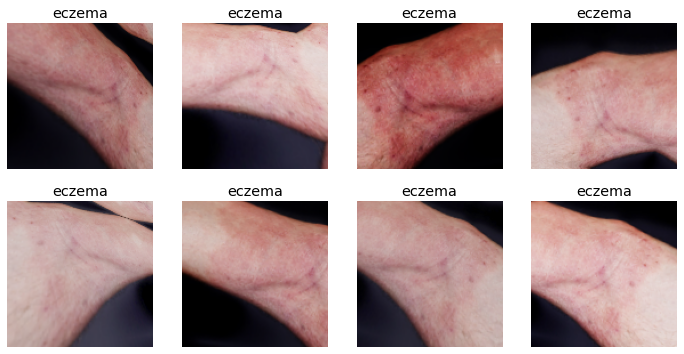

In [21]:
rashes = rashes.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = rashes.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [22]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(10)

epoch,train_loss,valid_loss,error_rate,time
0,1.830120,1.660307,0.679487,00:03


epoch,train_loss,valid_loss,error_rate,time
0,1.592993,1.254443,0.551282,00:03
1,1.538484,1.117867,0.474359,00:03
2,1.497680,1.119858,0.423077,00:03
3,1.425149,1.058852,0.346154,00:03
4,1.376521,0.963317,0.346154,00:03
5,1.289140,1.008061,0.358974,00:03
6,1.226283,1.094635,0.346154,00:03
7,1.166161,1.139078,0.358974,00:03
8,1.123283,1.146456,0.346154,00:03
9,1.094773,1.144764,0.333333,00:03


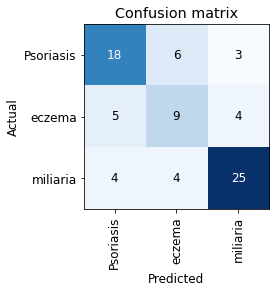

In [23]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

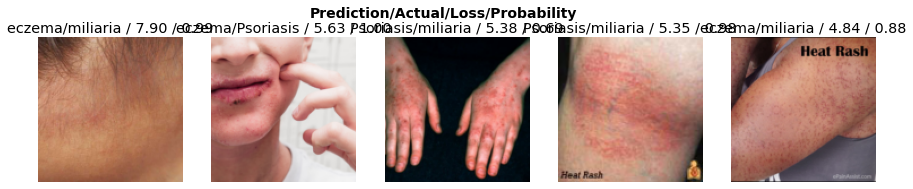

In [25]:
interp.plot_top_losses(5, nrows=1)

In [26]:
learn.export()
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [27]:
learn_inf = load_learner(path/'export.pkl')

In [28]:
!pip install voila
!jupyter serverextension enable --sys-prefix voila

     |████████████████████████████████| 1.9 MB 20.5 MB/s eta 0:00:01
     |████████████████████████████████| 552 kB 51.0 MB/s eta 0:00:01
     |████████████████████████████████| 186 kB 34.4 MB/s eta 0:00:01
     |████████████████████████████████| 62 kB 3.8 MB/s  eta 0:00:01
  Attempting uninstall: nbconvert
    Found existing installation: nbconvert 5.6.1
    Uninstalling nbconvert-5.6.1:
      Successfully uninstalled nbconvert-5.6.1
ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

nbdev 1.1.5 requires nbconvert<6, but you'll have nbconvert 6.0.7 which is incompatible.
Enabling: voila
- Writing config: /opt/conda/envs/fastai/etc/jupyter
    - Validating...
      voila 0.2.5 OK


In [40]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [41]:
img = PILImage.create(btn_upload.data[-1])

In [47]:
pred,pred_idx,probs = learn_inf.predict(img)
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: eczema; Probability: 0.4408')

In [48]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [49]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [44]:
btn_upload = widgets.FileUpload()

In [50]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [53]:
VBox([widgets.Label('Select your rash!'), 
      btn_upload, btn_run, out_pl, lbl_pred])

In [54]:
!pip install voila
!jupyter serverextension enable --sys-prefix voila

Enabling: voila
- Writing config: /opt/conda/envs/fastai/etc/jupyter
    - Validating...
      voila 0.2.5 OK
